##### **Identitas Mahasiswa:**
- Nama  : Triyana Dewi Fatmawati <br/>
- NIM   : 2241720206 <br/>
- Kelas : TI - 3H <br/>
- Nomor : 25 <br/>

---

# **Tugas**
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
    - Metode pra pengolahan
    - Pemilihan fitur
    - Arsitektur ANN
    - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.
- JELASKAN HASIL YANG ANDA DAPATKAN,
    - AKURASI
    - CONFUSION MATRIX
    - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN



## **Pengerjaan**

#### **Import Library**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

#### **Load Data**

In [2]:
# Memuat dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Tampilkan dimensi dataset
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


#### **Pra Pengolahan Data**

Reshape Data

In [14]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

Scaling Fitur

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding untuk label
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#### **Membuat Model ANN**

Inisiasi Model ANN

In [17]:
ann = tf.keras.models.Sequential()

Membuat Input Layer dan Hidden Layer Pertama

In [18]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(28*28,)))

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Membuat Hidden Layer Kedua

In [19]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

Membuat Output Layer

In [20]:
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))  # 10 kelas untuk 0-9

#### **Training Model**

Compile Model (Menyatukan Arsitektur) ANN

In [21]:
# Compile model dengan categorical_crossentropy
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting Model

In [22]:
# Fit model dengan y_train_one_hot
history = ann.fit(X_train, y_train_one_hot, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8752 - loss: 0.4112 - val_accuracy: 0.9554 - val_loss: 0.1506
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9675 - loss: 0.1059 - val_accuracy: 0.9619 - val_loss: 0.1351
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9793 - loss: 0.0679 - val_accuracy: 0.9641 - val_loss: 0.1374
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9827 - loss: 0.0518 - val_accuracy: 0.9677 - val_loss: 0.1245
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9862 - loss: 0.0462 - val_accuracy: 0.9682 - val_loss: 0.1297
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9911 - loss: 0.0277 - val_accuracy: 0.9681 - val_loss: 0.1531
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9690 - val_loss: 0.1509
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9924 - loss: 0.0237 - 

#### **Membuat Prediksi**

In [34]:
# Membuat prediksi
y_pred = ann.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


#### **Cek Akurasi dan Confusion Matrix**

In [38]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9699


In [39]:
## Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.95      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.93      0.98      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



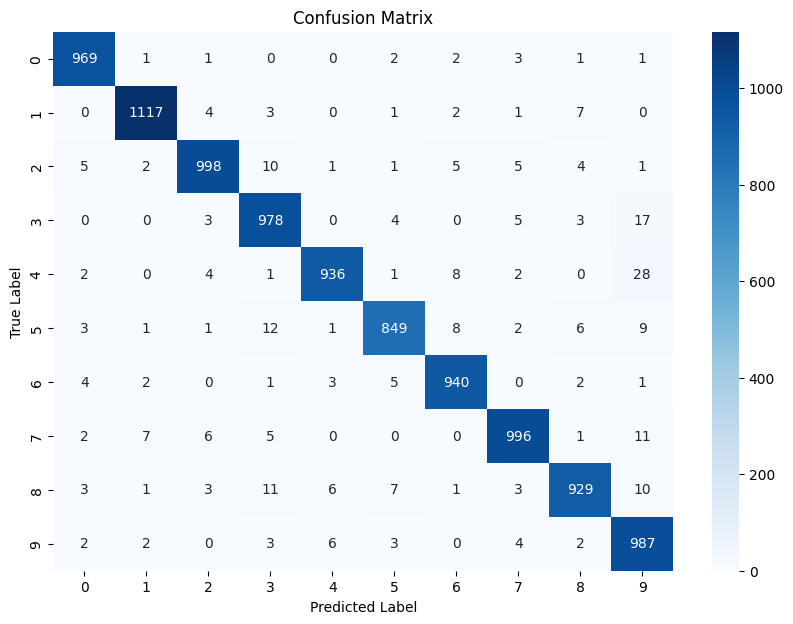

In [41]:
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix dengan anotasi
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Penjelasan**

##### **1. Akurasi** <br>
Model di atas mencapai akurasi 97%. Ini berarti bahwa model berhasil mengklasifikasikan 97 dari 100 gambar dengan benar. Akurasi yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik dalam mengenali dan membedakan angka dari 0 hingga 9.

##### **2. Confusion Matrix** <br>
Confusion matrix adalah tabel yang merangkum hasil prediksi model dan menunjukkan jumlah prediksi benar dan salah untuk setiap kelas. Ini membantu dalam memahami di mana model berkinerja baik dan di mana kesalahan terjadi.

##### **3. Konfigurasi Model** <br>
1) Pra-pengolahan Data
- Load Data: Dataset MNIST dimuat, yang terdiri dari 60,000 gambar untuk pelatihan dan 10,000 gambar untuk pengujian.
- Reshape Data: Data gambar (28x28 piksel) diubah menjadi vektor 1D (784 piksel) agar sesuai dengan input ANN.
- Scaling Fitur: Menggunakan StandardScaler untuk menormalkan data, mengubah nilai piksel dari rentang [0, 255] menjadi rentang [0, 1], yang membantu mempercepat konvergensi model.
- One-hot Encoding: Label kelas (0-9) dikonversi menjadi representasi one-hot, yang memungkinkan model mengoutput probabilitas untuk setiap kelas.

2) Arsitektur ANN
- Input Layer: Lapisan input memiliki 128 neuron dengan fungsi aktivasi ReLU (Rectified Linear Unit). Fungsi ini dipilih karena kemampuannya dalam menangani non-linearitas dan mencegah masalah vanishing gradient.
- Hidden Layer Pertama:
Terdiri dari 128 neuron dan menggunakan fungsi aktivasi ReLU. Layer ini menambah kompleksitas model sehingga dapat belajar dari pola yang lebih dalam.
- Hidden Layer Kedua:
Terdiri dari 64 neuron, juga dengan fungsi aktivasi ReLU. Menambah lapisan ini membantu model dalam belajar lebih kompleksitas tanpa menyebabkan overfitting.
- Output Layer:
Terdiri dari 10 neuron, masing-masing mewakili kelas angka dari 0 hingga 9, menggunakan fungsi aktivasi softmax. Softmax memberikan distribusi probabilitas untuk setiap kelas, memungkinkan pemilihan kelas dengan probabilitas tertinggi.

3) Pelatihan Model
- Kompilasi Model: Menggunakan optimizer Adam dan loss function categorical_crossentropy, yang merupakan pilihan tepat untuk masalah klasifikasi multi-kelas.
- Fitting Model: Model dilatih dengan data pelatihan selama 10 epoch dengan batch size 32. Sebanyak 20% dari data pelatihan digunakan untuk validasi, memungkinkan pemantauan kinerja model selama pelatihan.


### **Kesimpulan**
Model ANN di atas menunjukkan hasil yang cukup baik dengan akurasi 97%. Konfigurasi model, mulai dari pra-pengolahan data hingga arsitektur ANN, telah diatur secara efektif untuk mencapai hasil tersebut.